In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

import pandas as pd

import glob
import scipy

import cooler

%matplotlib inline

In [4]:
chromnames = cooler.Cooler("../data/cool/A549_NA_NA.100000.cool").chromnames
PATH_COMP = "../data/eigenvectors/"

In [25]:
files = glob.glob(PATH_COMP+"*100000.bed")

df = pd.DataFrame(columns=['ch', 'bgn', 'end', 'value', 'exp'])
df = pd.read_csv(files[0], header=None, sep='\t')
reference_value_column = files[0].split('/')[-1].split('.')[0]
df.columns = ['ch', 'bgn', 'end',  reference_value_column]

for f in files[1:]:
    df_tmp = pd.read_csv(f, header=None, sep='\t')
    value_column   = f.split('/')[-1].split('.')[0]
    df_tmp.columns = ['ch', 'bgn', 'end',  value_column]

    # Inversing compartments sign to the same
    for ch in np.unique(df_tmp.ch.values):
        reference_eig = df.query("ch=='{}'".format(ch))[reference_value_column]
        current_eig   = df_tmp.loc[df.ch==ch, value_column].values
        mask = np.isfinite(reference_eig) & np.isfinite(current_eig)
        correlation_coef = scipy.stats.pearsonr(reference_eig[mask], current_eig[mask])[0]
        if correlation_coef<0:
            df_tmp.loc[df.ch==ch, value_column] = -1*df_tmp.loc[df.ch==ch, value_column]
    
    df = pd.merge(df, df_tmp, on=['ch', 'bgn', 'end'])

<Figure size 720x720 with 0 Axes>

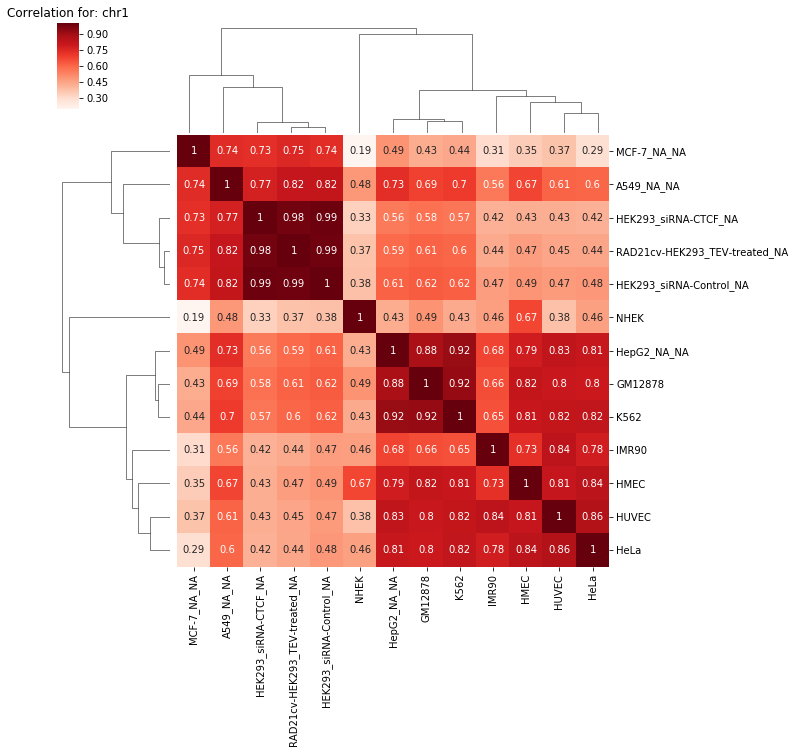

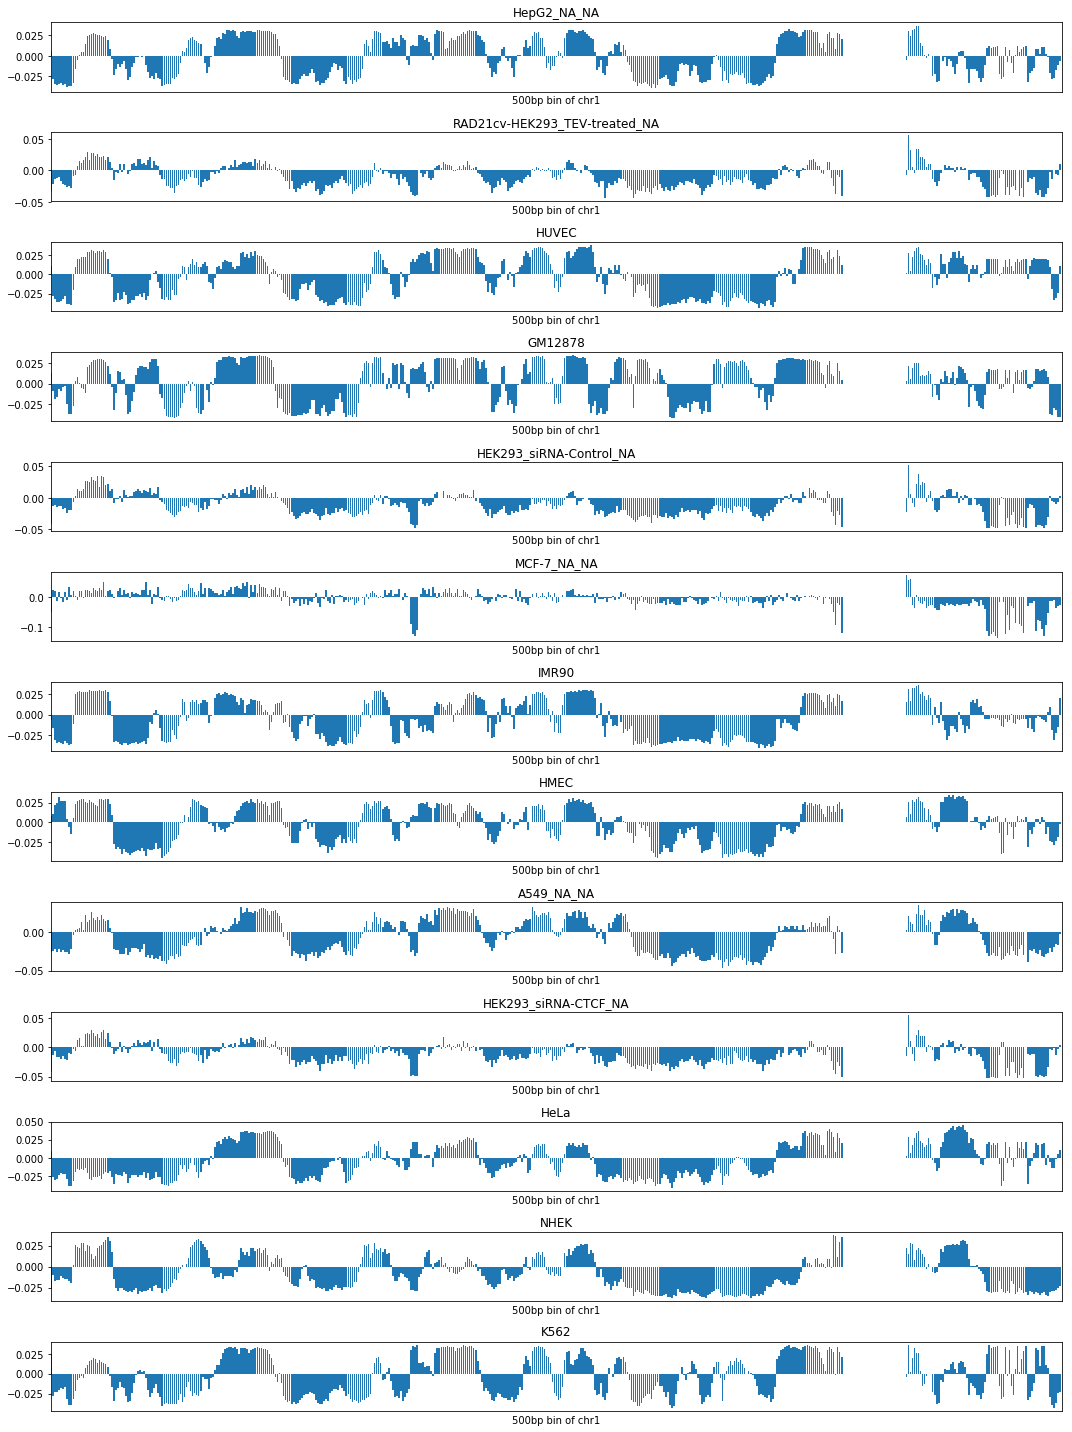

<Figure size 720x720 with 0 Axes>

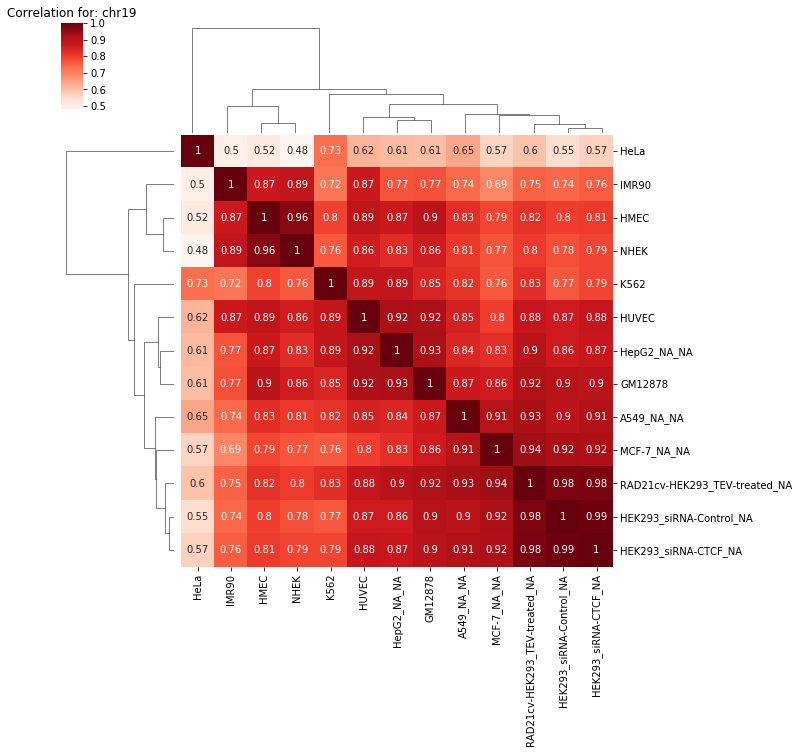

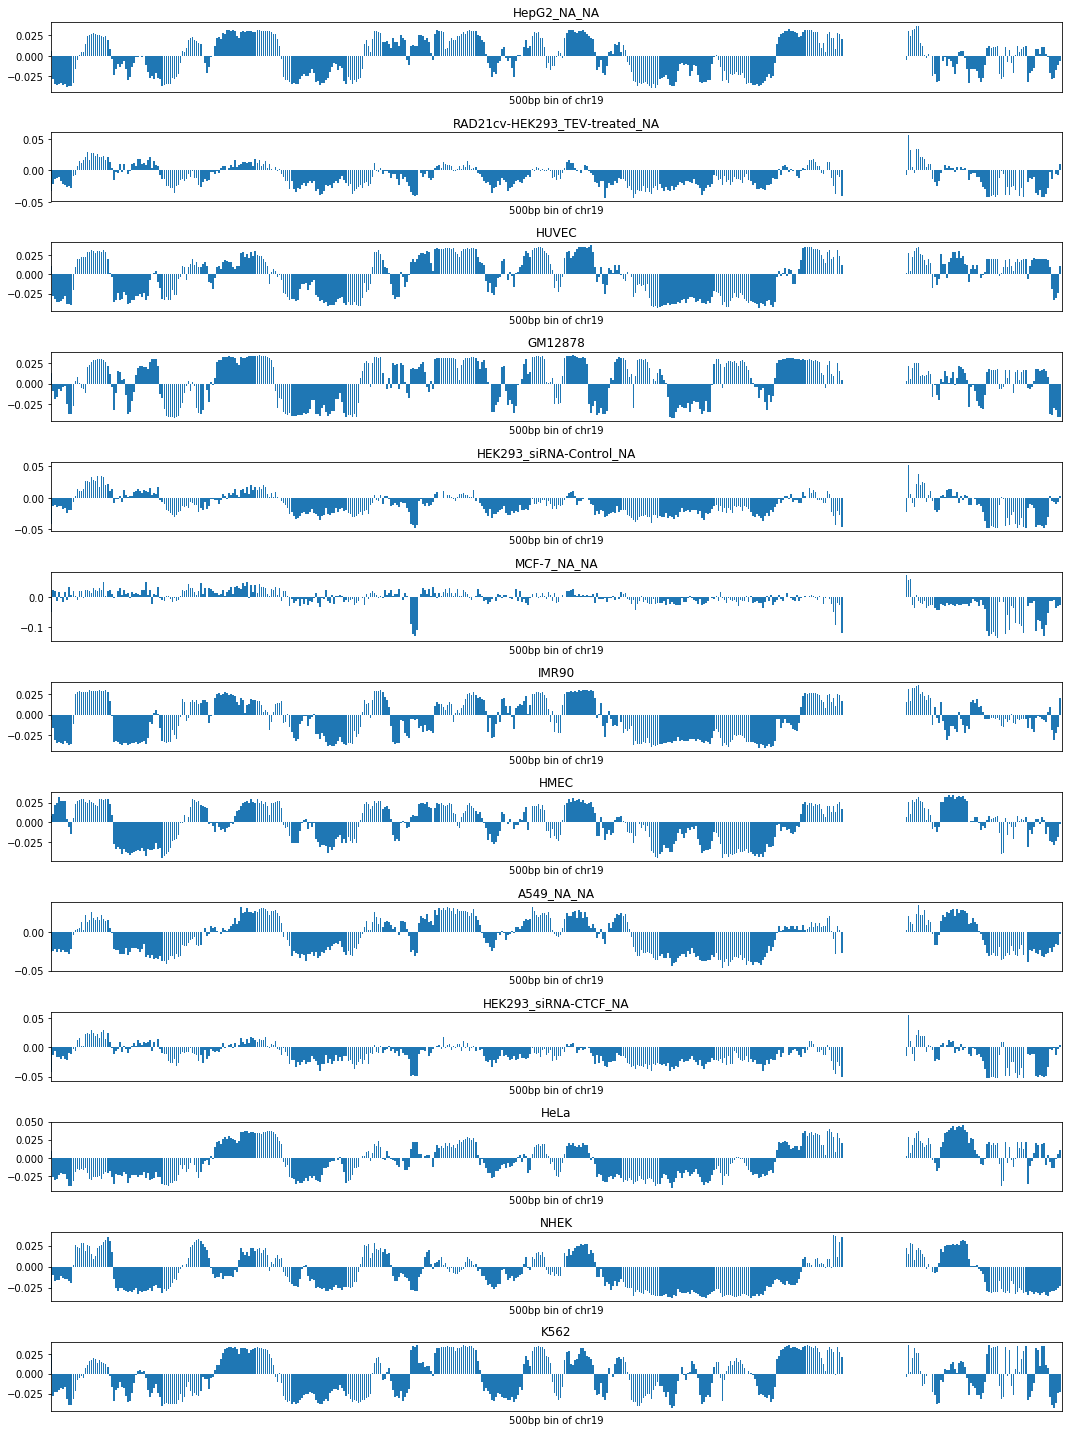

<Figure size 720x720 with 0 Axes>

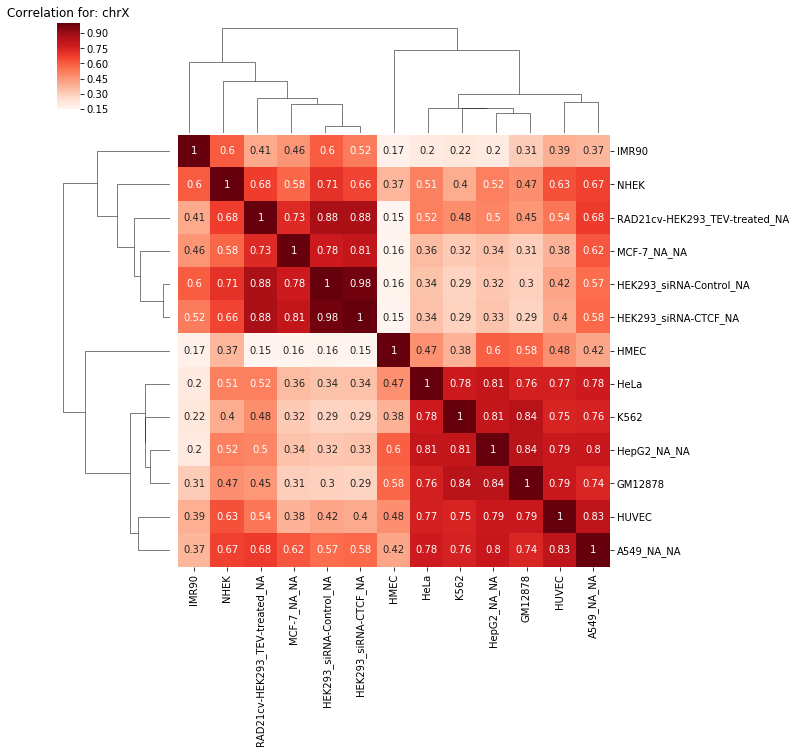

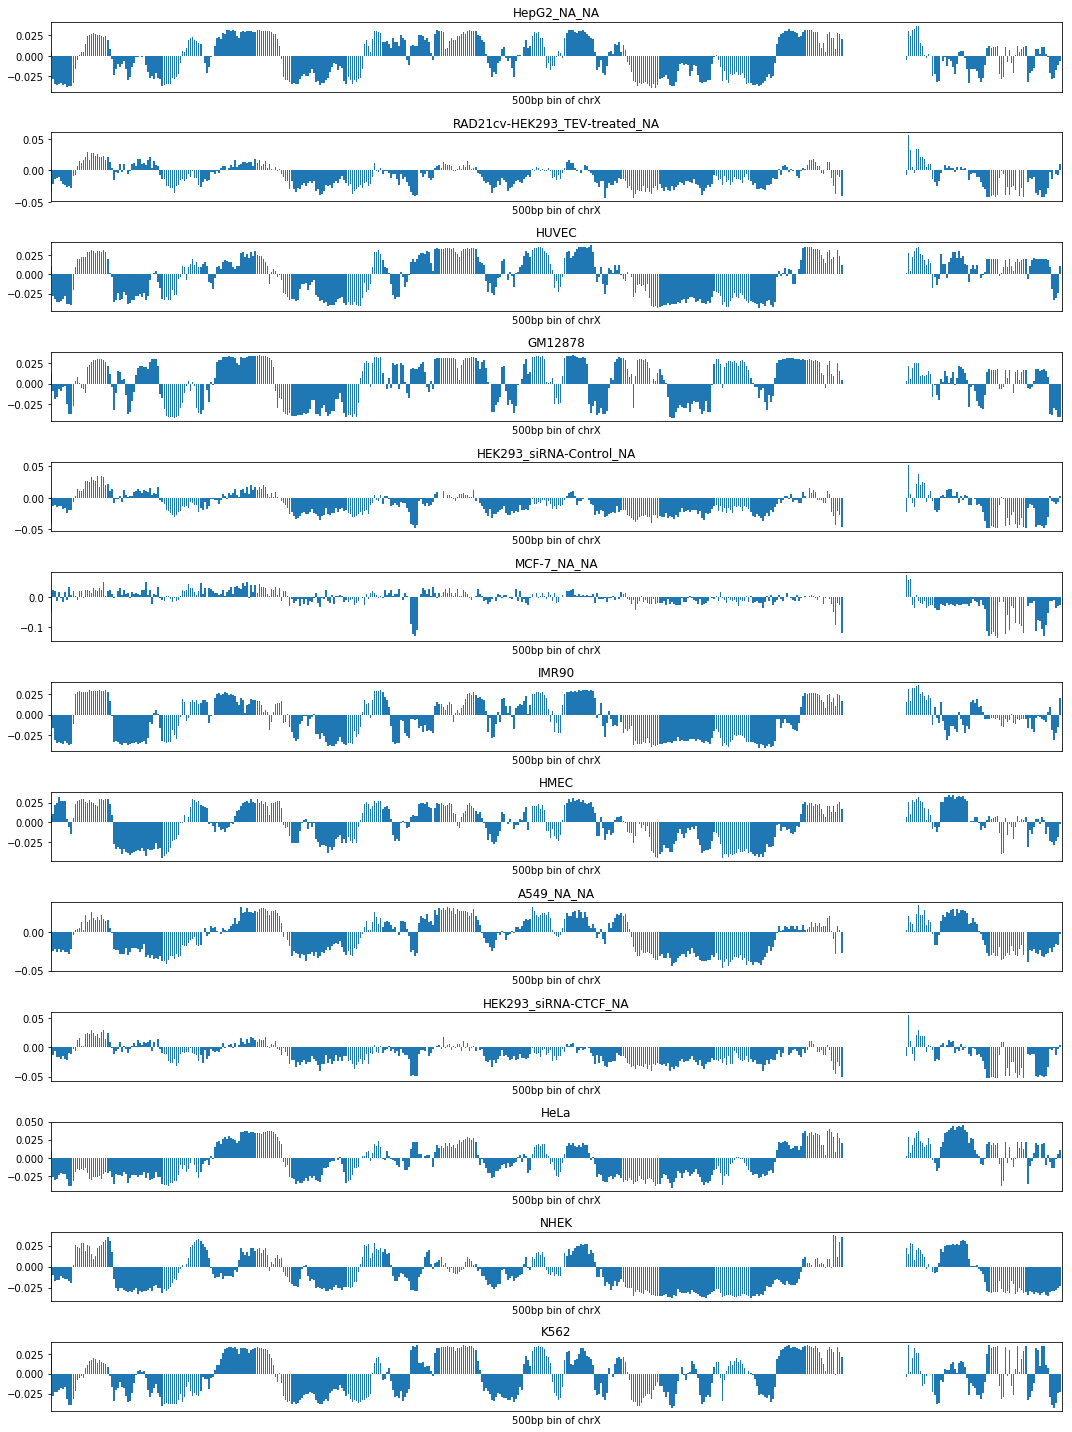

<Figure size 720x720 with 0 Axes>

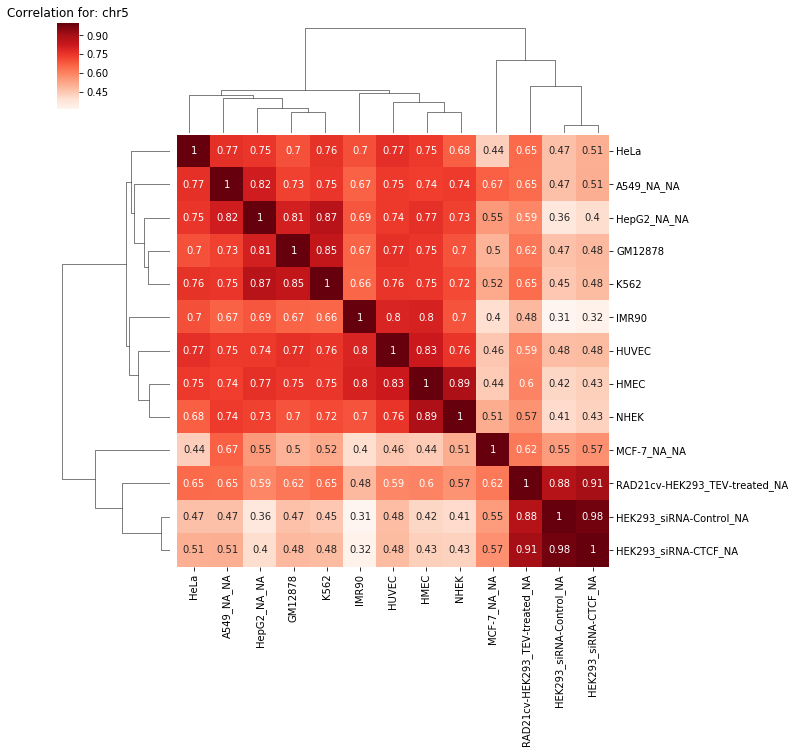

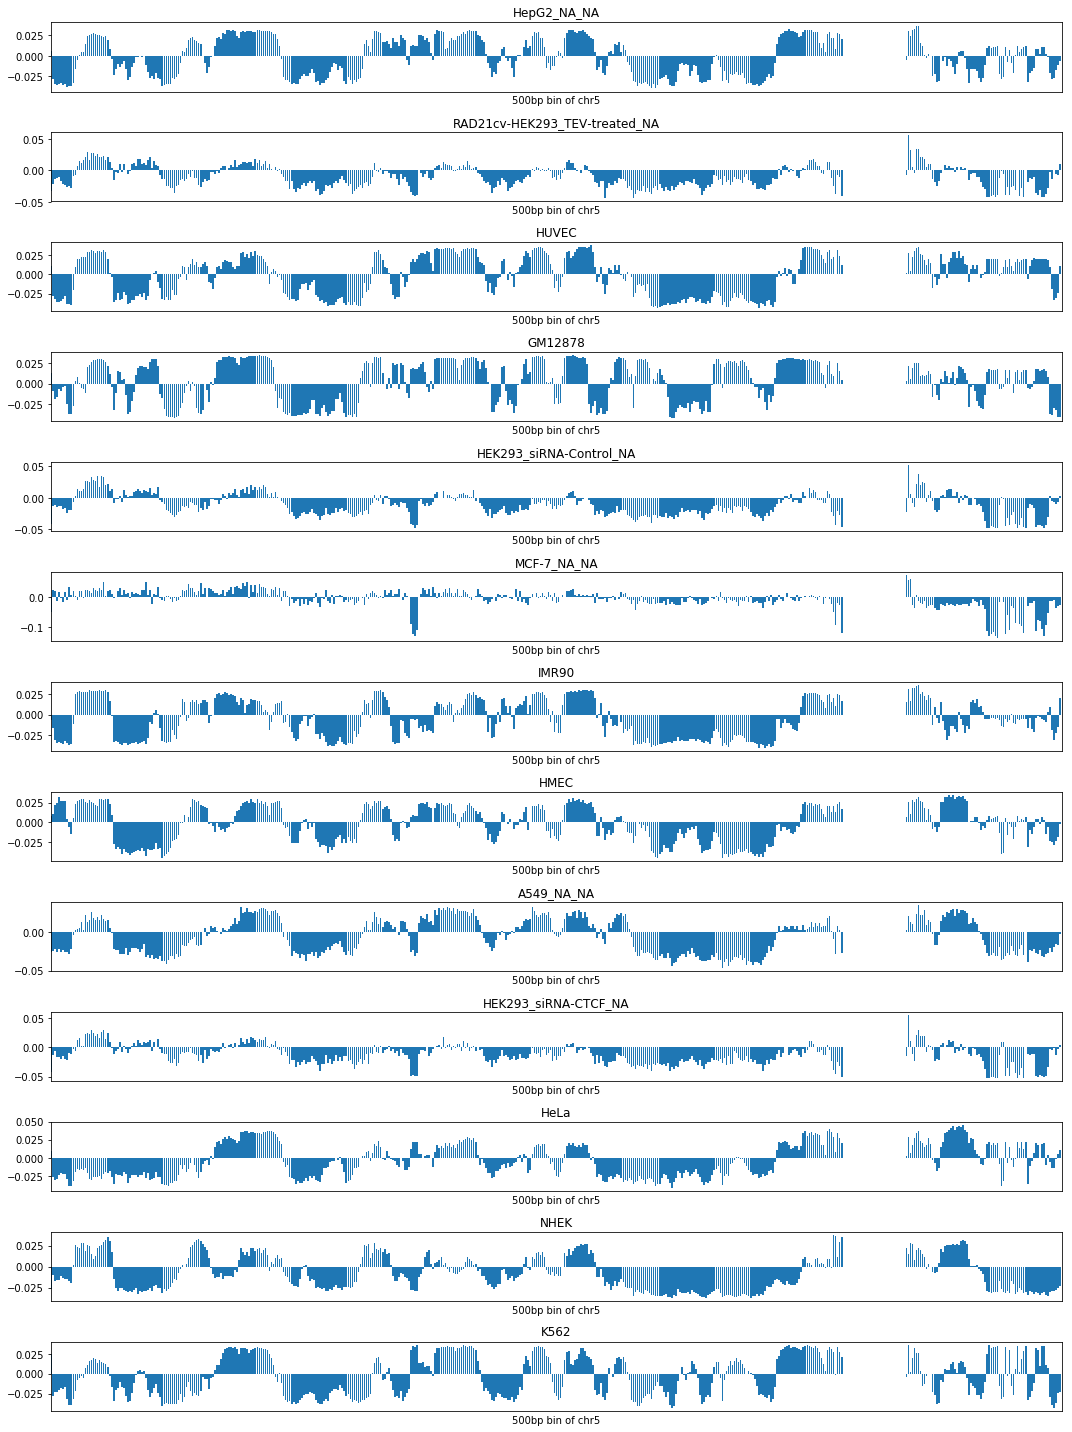

In [26]:
for ch in ['chr1', 'chr19', 'chrX', 'chr5']: # or in chromnames
    
    df_tmp = df.query("ch=='{}'".format(ch)).copy()
    df_tmp = df_tmp.drop(['ch', 'bgn', 'end'], axis=1)
    
    plt.figure(figsize=[10,10])
    sns.clustermap(df_tmp.corr(), square=True, annot=True, cmap="Reds")
    plt.title("Correlation for: {}".format(ch))

    f = plt.figure(figsize=[15,20])
    for i, col in enumerate(df_tmp.columns):
        ax = f.add_subplot(len(df_tmp.columns), 1, i+1)
        ax.bar(np.arange(500), df[col][0:500])
        ax.set_title(col)
        if i!=len(df.columns)-1:
            ax.set_xticks([])
            ax.set_xlabel('500bp bin of {}'.format(ch))
        ax.set_xlim([0,500])

    f.tight_layout()